In [17]:
import pandas as pd
import numpy as np
import sys
import pickle
import glob
import os
import shutil
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import colors, cm, pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tempfile
import zipfile
import json

In [18]:
# loads the metadata, ms1 points, and ms2 points from the specified zip file
def load_precursor_cuboid_zip(filename):
    temp_dir = tempfile.TemporaryDirectory().name
    with zipfile.ZipFile(filename, "r") as zf:
        zf.extractall(path=temp_dir)
        names = zf.namelist()
        with open('{}/{}'.format(temp_dir, names[0])) as json_file:
            metadata = json.load(json_file)
        ms1_df = pd.read_pickle('{}/{}'.format(temp_dir, names[1]))
        ms2_df = pd.read_pickle('{}/{}'.format(temp_dir, names[2]))
    # clean up the temp directory
    shutil.rmtree(temp_dir)
    return (metadata, ms1_df, ms2_df)

In [19]:
EXPERIMENT_NAME = 'P3856'
RUN_NAME = 'P3856_YHE211_10_Slot1-1_1_5113'
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/{}'.format(EXPERIMENT_NAME)
precursor_id = 10125

In [20]:
file_names_l = glob.glob('{}/precursor-cuboids/{}/exp-{}-run-{}-precursor-{}-of-*.zip'.format(EXPERIMENT_DIR, RUN_NAME, EXPERIMENT_NAME, RUN_NAME, precursor_id))
CUBOID_ZIP_FILE = file_names_l[0]

In [21]:
# extract the components of the cuboid
precursor_metadata, ms1_points_df, ms2_points_df = load_precursor_cuboid_zip(CUBOID_ZIP_FILE)

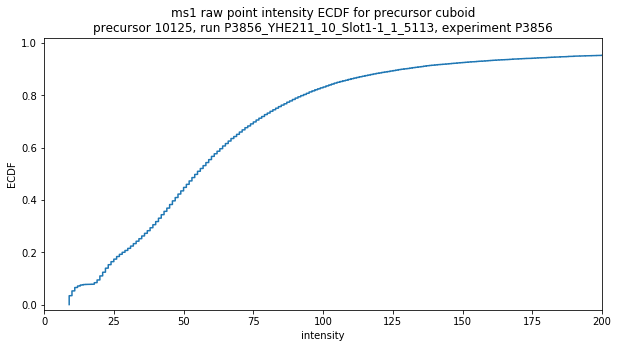

In [24]:
# determine the best clipping value using an ECDF

import statsmodels.api as sm
ecdf = sm.distributions.ECDF(ms1_points_df.intensity)

f, ax1 = plt.subplots()
plt.plot(ecdf.x, ecdf.y)
f.set_figheight(5)
f.set_figwidth(10)
plt.xlabel('intensity')
plt.ylabel('ECDF')
# plt.axvline(x=3000, linestyle=':', linewidth=1, color='orange')
plt.xlim((0,200))
plt.margins(0.02)
plt.title("ms1 raw point intensity ECDF for precursor cuboid\nprecursor {}, run {}, experiment {}".format(precursor_id, RUN_NAME, EXPERIMENT_NAME))
plt.show()